# Panel Estimation with Python using `linearmodels`

`nbextensions-configurator`

In [136]:
import pandas as pd
import linearmodels as lm
import numpy as np

## But before we go there...

What is an index in `pandas`? Let's make some random data in Python and check it out.

In [93]:
"""
Make some random data using `numpy`. This uses `randint` in `numpy.random`
    - `randint` is a discrete uniform which takes a low (0) and a high (100)
    - as well as size, which can take a as many dimensions as you want (in this case 2.)
    - columns let's us provide a string, which names each column.
        - this uses a trick, where we use the list function to break a string into a list where each
            part of the string is an element (`list("ABCD") = ['A', 'B', 'C', 'D']`)
"""

df_size = 100

data = {
    'A' : range(df_size),
    'B' : np.random.randint(0,5, size= df_size),
    'C' : np.random.randint(0,100, size= df_size),
    'D' : np.random.randint(0,500, size= df_size)
}

df = pd.DataFrame(data)


df

,A,B,C,D
0,0,3,55,51
1,1,0,14,204
2,2,1,90,131
3,3,4,55,371
4,4,0,61,352
...,...,...,...,...
95,95,1,8,78
96,96,4,64,454
97,97,4,17,433
98,98,4,83,297


In this case, we can see that our index (in bold), goes from 0 to 99 (python starts at 0). In fact we can get access the index like so:

In [94]:
df.index

RangeIndex(start=0, stop=100, step=1)

This lets us know that the index is just a range (much like the `range()` function).

Now let's change the variables names to something that would be nicer for an economics application. Let's say that:

- A is hhid
- B is time
- C is income
- D is consumption

We can rename these variables using the `rename` method of `pandas`.

In [141]:
"""
We rename our columns using the `rename` method of the dataframe. 
`rename` takes a dictionary that maps the column name to a new column name

Note: does not do in-place. You must specify `inplace=True` to make an inplace operation.
Pandas doesn't like overwriting data, so by default many methods don't actually change the underlying data.
This helps, especially in jupyter, because you might be running a lot of code out order (rerunning cell [5]
, to get data to run cell [20]) orders. 
Not doing inplace will make all the data "order-agnostic" so you don't have to look to make sure that the data
wasn't changed somewhere
"""

ndf =df.rename({
    'A' : "hhid",
    'B' : "time",
    'C' : "income",
    'D' : "consumption"
}, axis = 'columns')


ndf


,hhid,time,income,consumption
0,0,3,55,51
1,1,0,14,204
2,2,1,90,131
3,3,4,55,371
4,4,0,61,352
...,...,...,...,...
95,95,1,8,78
96,96,4,64,454
97,97,4,17,433
98,98,4,83,297


Awesome! So what if the my data is a crossection of households and I want to specify that the data is organized like that.

I can change the index to do this!


In [96]:
ndf.set_index("hhid") ## Again, not inplace

,village_id,income,consumption
hhid,,,
0,3,55,51
1,0,14,204
2,1,90,131
3,4,55,371
4,0,61,352
...,...,...,...
95,1,8,78
96,4,64,454
97,4,17,433


### Digression: Method Chaining

Instead of doing operations one line at a time, we can chain many pandas methods together, as long as the output of the method is, itself a pandas dataframe. So if we wanted to put our `rename` method and `set_index` method together, we could. This creates readable code (also you can put the dataframe into parantheses to get indentation from Jupyter

In [146]:
new_df = (df
     .rename({
    'A' : "hhid",
    'B' : "village_id",
    'C' : "income",
    'D' : "consumption"
}, axis = 'columns')
     .set_index("hhid")
     )

new_df

,village_id,income,consumption
hhid,,,
0,3,55,51
1,0,14,204
2,1,90,131
3,4,55,371
4,0,61,352
...,...,...,...
95,1,8,78
96,4,64,454
97,4,17,433


We can even write our own functions that manipulate dataframes and use the `pipe` method:

In [147]:
"""
Using lambda functions are nice and can be sort of likened to the `tidyverse` operation of using . notation 
to refer to variable names that implicitly (.x to signify that there is a column in this dataframe)
"""

def time_assigner(df, period=5):
    aux_df = df.assign(time = period)
    return aux_df

new_df = (df
          .rename({
              'A' : "hhid",
              'B' : "village_id",
              'C' : "income",
              'D' : "consumption"
          }, axis = 'columns')
          .pipe(time_assigner, period=1)
          .set_index("hhid")
     )

new_df

,village_id,income,consumption,time
hhid,,,,
0,3,55,51,1
1,0,14,204,1
2,1,90,131,1
3,4,55,371,1
4,0,61,352,1
...,...,...,...,...
95,1,8,78,1
96,4,64,454,1
97,4,17,433,1


### Okay, back to indices

Specifying indices is great, because it makes syntax easier commands, most nicely `groupby`, or for choosing an observation, or sorting.

In [153]:
new_df.groupby('hhid').income.mean()


hhid
0     55
1     14
2     90
3     55
4     61
      ..
95     8
96    64
97    17
98    83
99    29
Name: income, Length: 100, dtype: int64

In [100]:
new_df.loc[55]

village_id       0
income          16
consumption    179
time             1
Name: 55, dtype: int64

In [117]:
new_df.sort_index()

,village_id,income,consumption,time
hhid,,,,
0,3,55,51,1
1,0,14,204,1
2,1,90,131,1
3,4,55,371,1
4,0,61,352,1
...,...,...,...,...
95,1,8,78,1
96,4,64,454,1
97,4,17,433,1


But what if we have panel data? Can we specify more than one index? YES. And this will come in handy for panel estimation! This is called a MultiIndex and it opens a very deep rabbit hole in Pandas



In [113]:
"""
If we want to use the dataframe that already has a specific column index, we first need to `reset_index()`
"""

double_index_df = (new_df
                .reset_index()
               .set_index(['hhid', 'time']))

double_index_df

,,village_id,income,consumption
hhid,time,,,
0,1,3,55,51
1,1,0,14,204
2,1,1,90,131
3,1,4,55,371
4,1,0,61,352
...,...,...,...,...
95,1,1,8,78
96,1,4,64,454
97,1,4,17,433


In [149]:
double_index_df.loc[(50,1)]

village_id       3
income          84
consumption    179
Name: (50, 1), dtype: int64

### Okay, finally panel estimation, right?

Okay, almost... We need to change our data a little bit to make it a panel with multiple time periods. Let's create another random data, give it an hhid, time index and pipe the period=2 to it.

And then we'll just append those two together

In [116]:
data = {
    'A' : range(df_size),
    'B' : np.random.randint(0,5, size= df_size),
    'C' : np.random.randint(0,100, size= df_size),
    'D' : np.random.randint(0,500, size= df_size)
}

df_2 = (pd.DataFrame(data)
        .rename({
              'A' : "hhid",
              'B' : "village_id",
              'C' : "income",
              'D' : "consumption"
          }, axis = 'columns')
        .pipe(time_assigner, period=2)
        .set_index(['hhid', 'time'])
       )

df_2

panel_df = pd.concat([double_index_df, df_2], sort=True)

panel_df.sort_index()


consumption  income  village_id
hhid time                                 
0    1              51      55           3
     2             440       9           2
1    1             204      14           0
     2              19       8           2
2    1             131      90           1
...                ...     ...         ...
97   2             449      31           0
98   1             297      83           4
     2              81      36           1
99   1             269      29           3
     2             308      68           3

[200 rows x 3 columns]

In [108]:

panel_df.groupby('time')['income'].mean()

time
1    45.29
2    53.46
Name: income, dtype: float64

## Panel OLS with `linearmodels`

Now we're finally here! Since panel OLS is deprecated in statsmodels, we are going to use `linearmodels` to run Panel estimation. You can find the Github here:

[https://github.com/bashtage/linearmodels](https://github.com/bashtage/linearmodels)

`linearmodels` needs multiindices in order to work (it takes the first index as id, and the second as time, let's say)

You might have to install linearmodels with `pip`, which you can do by opening a terminal in the jupyter homepage.



Let's say we want to use household fixed effects on our model and regress income on consumption, we would run (btw, we made the import at the very beginning):

In [157]:
mod = lm.PanelOLS(panel_df['consumption'], panel_df['income'], entity_effects=True, time_effects=True)

mod = lm.PanelOLS.from_formula('consumption ~ income + EntityEffects +TimeEffects', data = panel_df)

res = mod.fit(cov_type='clustered', cluster_entity=True, clusters=panel_df['village_id'])

res.summary

Dep. Variable:,consumption,R-squared:,0.0160
Estimator:,PanelOLS,R-squared (Between):,0.1971
No. Observations:,200,R-squared (Within):,0.0165
Date:,"Fri, Jan 24 2020",R-squared (Overall):,0.1725
Time:,13:34:02,Log-likelihood,-1215.8
Cov. Estimator:,Clustered,,
,,F-statistic:,1.5983
Entities:,100,P-value,0.2091
Avg Obs:,2.0000,Distribution:,"F(1,98)"
Min Obs:,2.0000,,
Max Obs:,2.0000,F-statistic (robust):,0.5367


In [160]:
import matplotlib.pyplot as plt

[Ipypublish here](https://github.com/chrisjsewell/ipypublish)

<IPython.core.display.Javascript object>


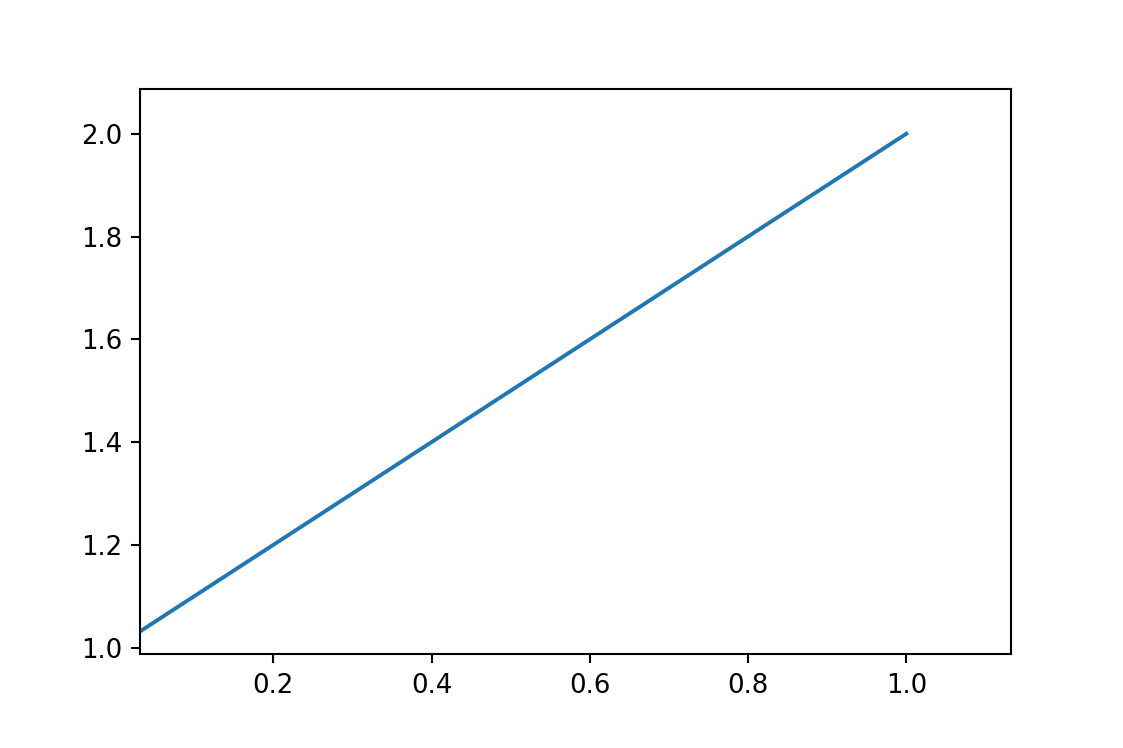

In [164]:
%matplotlib notebook

plt.plot([1,2])

In [ ]:
%%R -i df

libray(tidyverse)



rpy2

ipsytata

`feather`